## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import PredefinedSplit
from sklearn import tree
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

## Load Features

In [7]:
# Export feature table to file
feature_df = pd.read_csv("../Data/Features/features_20200226.csv",index_col=0)
feature_df

,HomeTeam,AwayTeam,Date,Season,Div,FTR,home_prev_8_draw,home_prev_8_gc,home_prev_8_gs,away_prev_8_draw,away_prev_8_gc,away_prev_8_gs,x0_Away,x0_Home,x0_Neither,x1_Away,x1_Home,x1_Neither
0,Bournemouth,Aston Villa,2015-08-08,1516,E0,A,2,5.0,19.0,1,18.0,12.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Chelsea,Swansea,2015-08-08,1516,E0,D,2,6.0,10.0,1,11.0,12.0,0.0,1.0,0.0,0.0,1.0,0.0
2,Everton,Watford,2015-08-08,1516,E0,D,1,8.0,10.0,2,5.0,13.0,1.0,0.0,0.0,0.0,1.0,0.0
3,Leicester,Sunderland,2015-08-08,1516,E0,H,1,6.0,17.0,3,9.0,8.0,0.0,1.0,0.0,1.0,0.0,0.0
4,Man United,Tottenham,2015-08-08,1516,E0,H,2,10.0,10.0,2,8.0,8.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16771,Newcastle,West Brom,2011-05-22,1011,E0,D,3,13.0,9.0,2,14.0,14.0,1.0,0.0,0.0,0.0,1.0,0.0
16772,Stoke,Wigan,2011-05-22,1011,E0,A,3,9.0,14.0,3,11.0,12.0,0.0,0.0,1.0,0.0,1.0,0.0
16773,Tottenham,Birmingham,2011-05-22,1011,E0,H,4,11.0,12.0,2,15.0,8.0,0.0,0.0,1.0,0.0,1.0,0.0
16774,West Ham,Sunderland,2011-05-22,1011,E0,A,2,18.0,7.0,0,21.0,9.0,1.0,0.0,0.0,0.0,1.0,0.0


In [8]:
# Fix data types
feature_df['Date'] = feature_df['Date'].apply(func=datetime.datetime.strptime,args=["%Y-%m-%d"])
feature_df['Season'] = feature_df['Season'].apply(func=str)
feature_df['Season'] = feature_df['Season'].apply(lambda x: '0'+x if len(x)<4 else x)
feature_df

,HomeTeam,AwayTeam,Date,Season,Div,FTR,home_prev_8_draw,home_prev_8_gc,home_prev_8_gs,away_prev_8_draw,away_prev_8_gc,away_prev_8_gs,x0_Away,x0_Home,x0_Neither,x1_Away,x1_Home,x1_Neither
0,Bournemouth,Aston Villa,2015-08-08,1516,E0,A,2,5.0,19.0,1,18.0,12.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Chelsea,Swansea,2015-08-08,1516,E0,D,2,6.0,10.0,1,11.0,12.0,0.0,1.0,0.0,0.0,1.0,0.0
2,Everton,Watford,2015-08-08,1516,E0,D,1,8.0,10.0,2,5.0,13.0,1.0,0.0,0.0,0.0,1.0,0.0
3,Leicester,Sunderland,2015-08-08,1516,E0,H,1,6.0,17.0,3,9.0,8.0,0.0,1.0,0.0,1.0,0.0,0.0
4,Man United,Tottenham,2015-08-08,1516,E0,H,2,10.0,10.0,2,8.0,8.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16771,Newcastle,West Brom,2011-05-22,1011,E0,D,3,13.0,9.0,2,14.0,14.0,1.0,0.0,0.0,0.0,1.0,0.0
16772,Stoke,Wigan,2011-05-22,1011,E0,A,3,9.0,14.0,3,11.0,12.0,0.0,0.0,1.0,0.0,1.0,0.0
16773,Tottenham,Birmingham,2011-05-22,1011,E0,H,4,11.0,12.0,2,15.0,8.0,0.0,0.0,1.0,0.0,1.0,0.0
16774,West Ham,Sunderland,2011-05-22,1011,E0,A,2,18.0,7.0,0,21.0,9.0,1.0,0.0,0.0,0.0,1.0,0.0


In [9]:
# Check feature data types
dict(feature_df.dtypes)

{'HomeTeam': dtype('O'),
 'AwayTeam': dtype('O'),
 'Date': dtype('<M8[ns]'),
 'Season': dtype('O'),
 'Div': dtype('O'),
 'FTR': dtype('O'),
 'home_prev_8_draw': dtype('int64'),
 'home_prev_8_gc': dtype('float64'),
 'home_prev_8_gs': dtype('float64'),
 'away_prev_8_draw': dtype('int64'),
 'away_prev_8_gc': dtype('float64'),
 'away_prev_8_gs': dtype('float64'),
 'x0_Away': dtype('float64'),
 'x0_Home': dtype('float64'),
 'x0_Neither': dtype('float64'),
 'x1_Away': dtype('float64'),
 'x1_Home': dtype('float64'),
 'x1_Neither': dtype('float64')}

## Split Training and Test Datasets

In [10]:
# Split final validation set (18-19 Season)
test_df = feature_df[feature_df['Season']=='1819']
train_df = feature_df[feature_df['Season']!='1819']
print(f"Size of training set: {len(train_df)}\nSize of test set: {len(test_df)}\nNumber of features: {train_df.shape[1]}")

Size of training set: 3800
Size of test set: 380
Number of features: 18


In [11]:
# Seasons for doing a grouped k-fold cross-validation
cv_seasons = list(train_df['Season'].unique())
cv_seasons.sort()
cv_seasons

['0809',
 '0910',
 '1011',
 '1112',
 '1213',
 '1314',
 '1415',
 '1516',
 '1617',
 '1718']

In [ ]:
# Separate label from data
train_label = train_df['FTR']
test_label = test_df['FTR']
train_df = train_df.drop(remove_feature,axis=1)
test_df = test_df.drop(remove_feature,axis=1)

In [12]:
# Define cross-validation folds
cv_fold = []
for ind,season in enumerate(cv_seasons):
    test_seasons = cv_seasons[ind]
    buffer_seasons = None
    if ind < (len(cv_seasons)-1):
        buffer_seasons = cv_seasons[ind+1]
    train_seasons = [s for s in cv_seasons if s not in [test_seasons,buffer_seasons]]
    train_ind = np.array(train_df['Season'].isin(train_seasons))
    test_ind = np.array(train_df['Season'].isin([test_seasons]))
    cv_fold.append((train_ind,test_ind))
cv_fold

[(array([ True,  True,  True, ...,  True,  True,  True]),
  array([False, False, False, ..., False, False, False])),
 (array([ True,  True,  True, ..., False, False, False]),
  array([False, False, False, ..., False, False, False])),
 (array([ True,  True,  True, ..., False, False, False]),
  array([False, False, False, ...,  True,  True,  True])),
 (array([ True,  True,  True, ...,  True,  True,  True]),
  array([False, False, False, ..., False, False, False])),
 (array([ True,  True,  True, ...,  True,  True,  True]),
  array([False, False, False, ..., False, False, False])),
 (array([ True,  True,  True, ...,  True,  True,  True]),
  array([False, False, False, ..., False, False, False])),
 (array([False, False, False, ...,  True,  True,  True]),
  array([False, False, False, ..., False, False, False])),
 (array([False, False, False, ...,  True,  True,  True]),
  array([ True,  True,  True, ..., False, False, False])),
 (array([ True,  True,  True, ...,  True,  True,  True]),
  arra

In [13]:
# Remove keys and label
remove_feature = ['HomeTeam','AwayTeam','Date','Season','Div','FTR',]
train_df = train_df.drop(remove_feature,axis=1)
test_df = test_df.drop(remove_feature,axis=1)

## Training Decision Tree Model

In [14]:
# Hyperparameter tuning (Cross-validation)
max_depth = [2,4,8,16,32]
acc_score = []
for depth in max_depth:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    scores = cross_validate(clf,X=train_df,y=train_label,cv=cv_fold)
    acc_score.append((depth,scores['test_score'].mean()))
acc_score

[(2, 0.4989473684210526),
 (4, 0.4931578947368422),
 (8, 0.4726315789473684),
 (16, 0.42447368421052634),
 (32, 0.3944736842105263)]

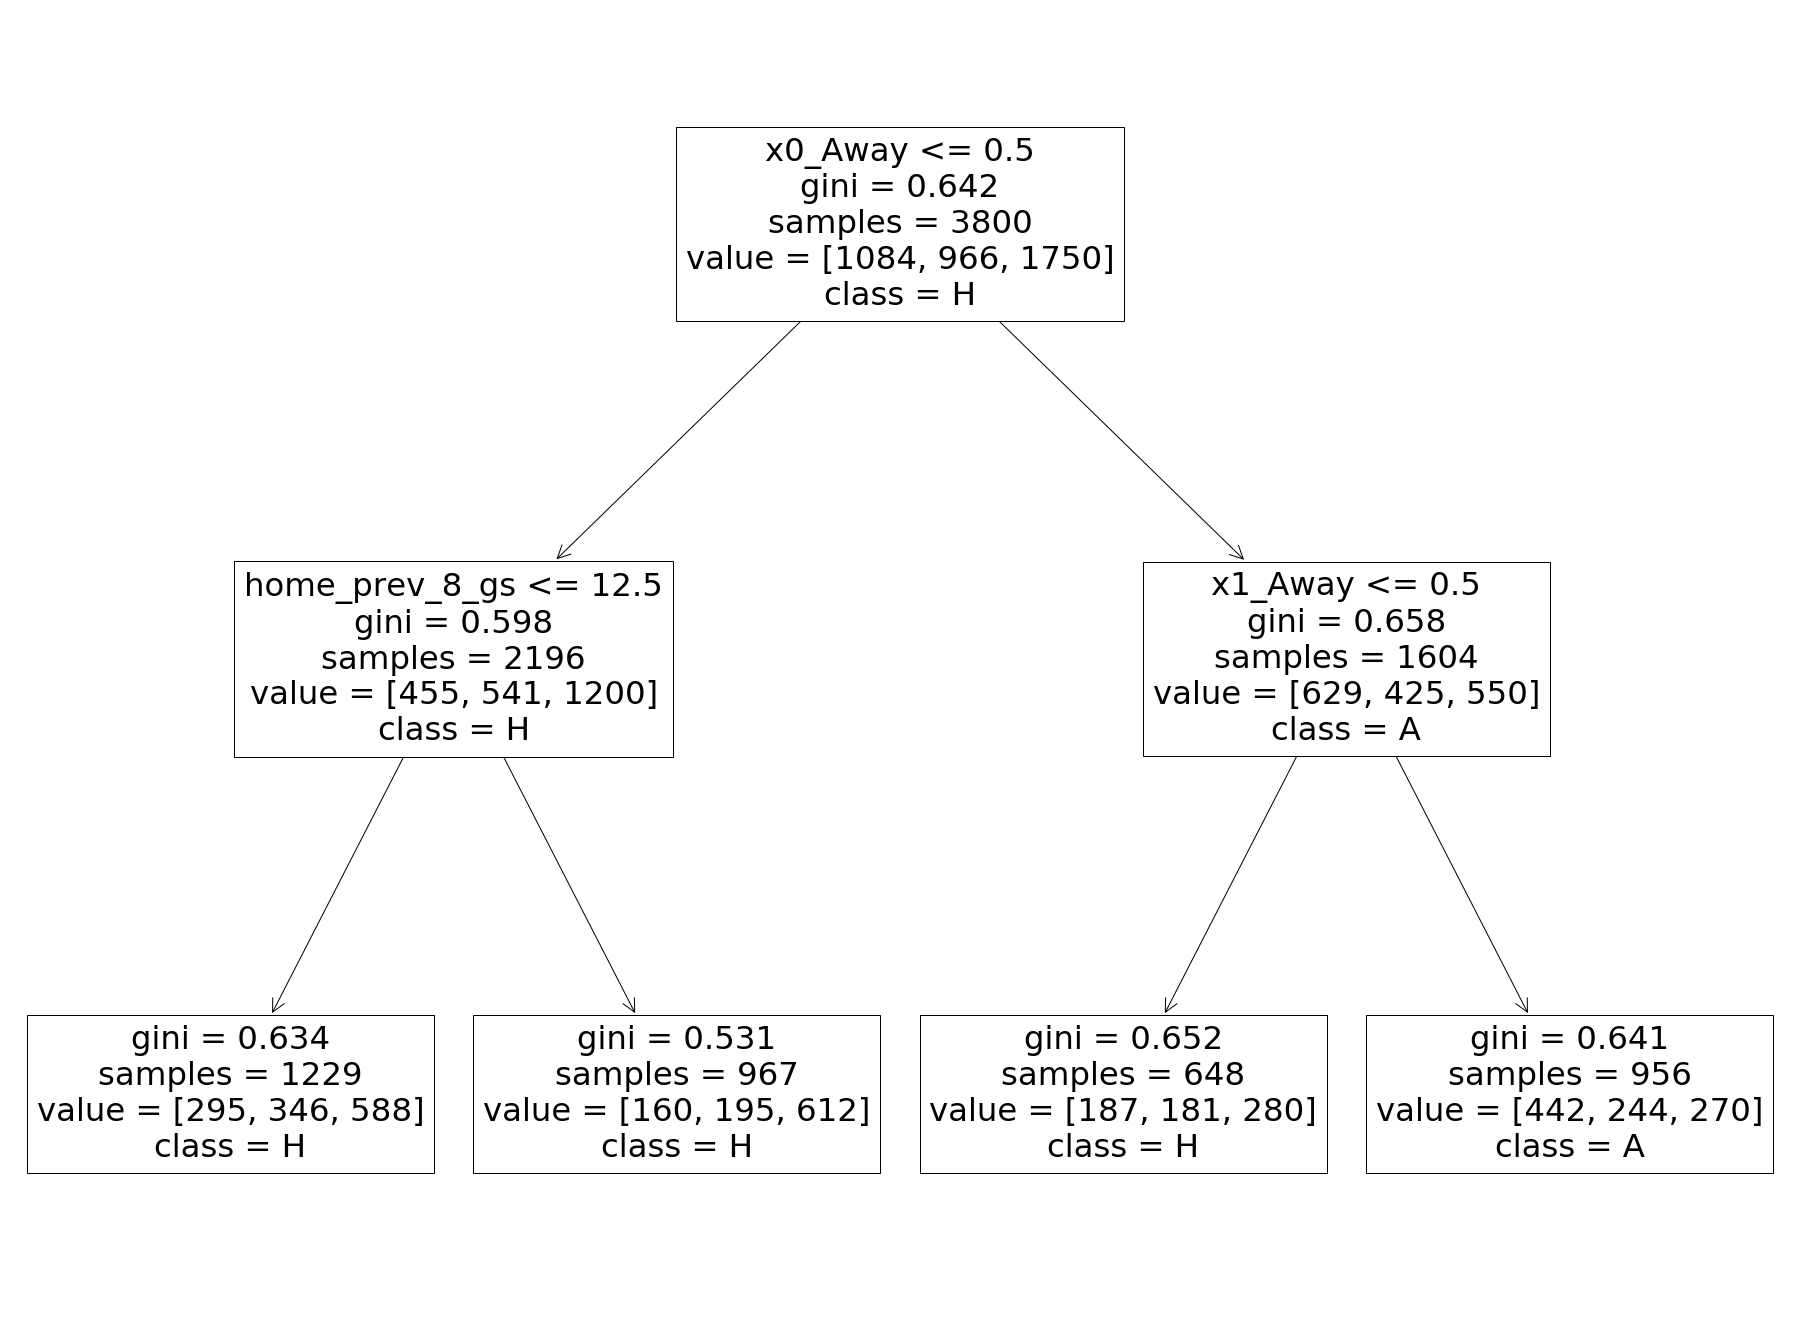

In [18]:
# Train decision tree classifier
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X=train_df,y=train_label)
plt.figure(figsize=[6.4*5,4.8*5])
tree.plot_tree(clf,feature_names=train_df.columns,class_names=clf.classes_)
plt.show()

In [19]:
# Test decision tree classifier
clf.score(test_df,test_label)

0.5342105263157895

In [20]:
feature_importance = []
for i,f in enumerate(list(train_df.columns)):
    feature_importance.append((f,clf.feature_importances_[i]))
feature_importance.sort(key=(lambda x: x[1]), reverse=True)
feature_importance

[('x0_Away', 0.6383252986034116),
 ('x1_Away', 0.1861181154577842),
 ('home_prev_8_gs', 0.17555658593880416),
 ('home_prev_8_draw', 0.0),
 ('home_prev_8_gc', 0.0),
 ('away_prev_8_draw', 0.0),
 ('away_prev_8_gc', 0.0),
 ('away_prev_8_gs', 0.0),
 ('x0_Home', 0.0),
 ('x0_Neither', 0.0),
 ('x1_Home', 0.0),
 ('x1_Neither', 0.0)]